In [1]:
import os
import shutil
import utilities as rocku
import matplotlib.pyplot as plt
import tomopy
import numpy as np
import pandas as pd
import pprint
import dxchange

olefile module not found


In [2]:
# need to change
ipts="27734"

In [3]:
ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
os.listdir(ct_loc)

['2022_09_30_bee', '2022_10_01_battery']

In [4]:
ob_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ob"
os.listdir(ob_loc)

['2022_09_30_high_res_gadox',
 '2022_10_03_battery',
 '2022_09_30_bee',
 '2022_09_30_high_res_gadox_LiF']

In [5]:
dc_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/df"
os.listdir(dc_loc)

['2022_10_14_high_res',
 '2022_09_30_power_cycle',
 '2022_09_30_0C',
 '2022_09_30']

In [16]:
###################### need to change start
sample_name = "2022_10_01_battery"
ct_dir = os.path.join(ct_loc, sample_name)
ob_dir = os.path.join(ob_loc, "2022_10_03_battery")
dc_dir = os.path.join(dc_loc, "2022_10_14_high_res")
# ct_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# ob_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
# dc_dir = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/raw_to_recon"
gamma_diff = 20
###################### need to change end

# Preprocess CT scan files

In [7]:
ordered_list, ang_list, ang_rad_list, idx_list = rocku.get_ind_list(os.listdir(ct_dir))
fname_df = pd.DataFrame()
fname_df['fname'] = ordered_list
fname_df['ang_deg'] = ang_list
fname_df['ang_rad'] = ang_rad_list
fname_df['ang_idx'] = idx_list
fname_df

,fname,ang_deg,ang_rad,ang_idx
0,20221001_battery_0030_000_000_2824.tiff,0.00,0.000000,2824
1,20221001_battery_0030_000_000_2825.tiff,0.00,0.000000,2825
2,20221001_battery_0030_000_000_2826.tiff,0.00,0.000000,2826
3,20221001_battery_0030_000_000_2827.tiff,0.00,0.000000,2827
4,20221001_battery_0030_000_000_2828.tiff,0.00,0.000000,2828
...,...,...,...,...
4099,20221003_battery_0030_268_450_6923.tiff,268.45,4.685336,6923
4100,20221003_battery_0030_268_450_6924.tiff,268.45,4.685336,6924
4101,20221003_battery_0030_268_450_6925.tiff,268.45,4.685336,6925
4102,20221003_battery_0030_268_450_6926.tiff,268.45,4.685336,6926


Projection at 0 degree:


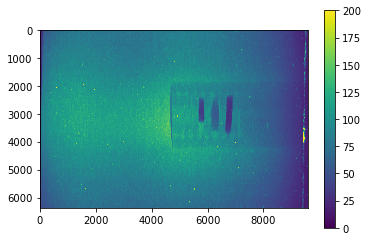

Projection at 180 degree:


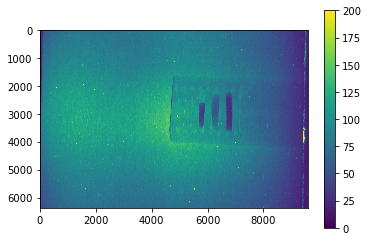

In [9]:
proj180_idx, proj180_ang = rocku.find_proj180_ind(ang_list)
preview_image_stack = rocku.read_tiff_stack(ct_dir, [ordered_list[0], ordered_list[proj180_idx]])
print("Projection at 0 degree:")
plt.imshow(preview_image_stack[0], vmin=0, vmax=200)
plt.colorbar()
plt.show()
print("Projection at 180 degree:")
plt.imshow(preview_image_stack[1], vmin=0, vmax=200)
plt.colorbar()
plt.show()

/SNS/users/y9z/anaconda3/envs/rockit/lib/python3.10/site-packages/tomopy/prep/alignment.py:575: RuntimeWarning: divide by zero encountered in log
  img = medfilt2d(np.log(img.astype(np.float64)),
/SNS/users/y9z/anaconda3/envs/rockit/lib/python3.10/site-packages/numpy/core/_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


Projection at 0 degree:


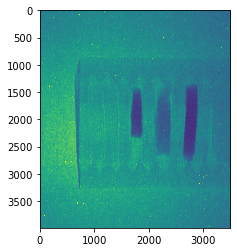

Projection at 180 degree:


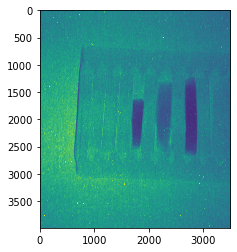

In [10]:
slit_box_corners = tomopy.prep.alignment.find_slits_corners_aps_1id(img=preview_image_stack[0], method='simple')
roi_corners = rocku.set_roi(corners=slit_box_corners, xmin=4000, ymin=1000, xmax=7500, ymax=5000)
preview_image_stack_crop = tomopy.prep.alignment.remove_slits_aps_1id(preview_image_stack, roi_corners)
print("Projection at 0 degree:")
plt.imshow(preview_image_stack_crop[0], vmin=0, vmax=200)
plt.show()
print("Projection at 180 degree:")
plt.imshow(preview_image_stack_crop[1], vmin=0, vmax=200)
plt.show()

In [11]:
ang_deg_list = list(set(fname_df['ang_deg']))
group_size = ang_list.count(ang_list[0]) # get the group size automatically
grouped_list = ordered_list[::group_size]
grouped_dict = {}
for i, e_ang in enumerate(ang_deg_list):
    _fname_list = list(fname_df[fname_df['ang_deg'] == e_ang]['fname'])
    grouped_dict[grouped_list[i]] = _fname_list
pprint.pprint(grouped_dict)

{'20221001_battery_0030_000_000_2824.tiff': ['20221001_battery_0030_000_000_2824.tiff',
                                             '20221001_battery_0030_000_000_2825.tiff',
                                             '20221001_battery_0030_000_000_2826.tiff',
                                             '20221001_battery_0030_000_000_2827.tiff',
                                             '20221001_battery_0030_000_000_2828.tiff',
                                             '20221001_battery_0030_000_000_2829.tiff',
                                             '20221001_battery_0030_000_000_2830.tiff',
                                             '20221001_battery_0030_000_000_2831.tiff',
                                             '20221001_battery_0030_000_000_2832.tiff'],
 '20221001_battery_0030_000_590_2833.tiff': ['20221001_battery_0030_002_950_2869.tiff',
                                             '20221001_battery_0030_002_950_2870.tiff',
                               

 '20221002_battery_0030_119_180_4642.tiff': ['20221002_battery_0030_194_110_5785.tiff',
                                             '20221002_battery_0030_194_110_5786.tiff',
                                             '20221002_battery_0030_194_110_5787.tiff',
                                             '20221002_battery_0030_194_110_5788.tiff',
                                             '20221002_battery_0030_194_110_5789.tiff',
                                             '20221002_battery_0030_194_110_5790.tiff',
                                             '20221002_battery_0030_194_110_5791.tiff',
                                             '20221002_battery_0030_194_110_5792.tiff',
                                             '20221002_battery_0030_194_110_5793.tiff'],
 '20221002_battery_0030_119_770_4651.tiff': ['20221002_battery_0030_195_290_5803.tiff',
                                             '20221002_battery_0030_195_290_5804.tiff',
                               

In [14]:
# for e_group in ['20221001_battery_0030_000_000_2824.tiff']:
for e_group in grouped_dict.keys():
    _fname_list = grouped_dict[e_group]
    print('Processing group start with {} ...'.format(e_group))
    print('Loading ...')
    _image_stack = rocku.read_tiff_stack(ct_dir, _fname_list)
    print('Cropping ...')
    _image_stack_crop = tomopy.prep.alignment.remove_slits_aps_1id(_image_stack, roi_corners)
    print('Removing outliers ...')
    _image_stack_cleaned = tomopy.remove_outlier(_image_stack_crop, gamma_diff)
    print('Combining with median ...')
    _image_med = np.median(_image_stack_cleaned, axis=0).astype(np.ushort)
    print('Rotating by 90 deg ...')
    _image_rot = np.rot90(_image_med, k=-1)
    ################ change save path for your own
    save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon/" + sample_name
    fname = save_to + "/" + e_group
    print('Saving {} ...'.format(fname))
    dxchange.write_tiff(_image_med, fname=fname, overwrite=True)

Processing group start with 20221001_battery_0030_000_000_2824.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_000_000_2824.tiff ...
Processing group start with 20221001_battery_0030_000_590_2833.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_000_590_2833.tiff ...
Processing group start with 20221001_battery_0030_001_180_2842.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_001_180_2842.tiff ...
Processing group start with 20221001_battery_0030_001_770_2851.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/aut

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_017_700_3094.tiff ...
Processing group start with 20221001_battery_0030_018_290_3103.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_018_290_3103.tiff ...
Processing group start with 20221001_battery_0030_018_880_3112.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_018_880_3112.tiff ...
Processing group start with 20221001_battery_0030_019_470_3121.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_019_470_3121.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_035_400_3364.tiff ...
Processing group start with 20221001_battery_0030_035_990_3373.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_035_990_3373.tiff ...
Processing group start with 20221001_battery_0030_036_580_3382.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_036_580_3382.tiff ...
Processing group start with 20221001_battery_0030_037_170_3391.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221001_battery_0030_037_170_3391.tiff ...
Processing group start with 202

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_053_690_3643.tiff ...
Processing group start with 20221002_battery_0030_054_280_3652.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_054_280_3652.tiff ...
Processing group start with 20221002_battery_0030_054_870_3661.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_054_870_3661.tiff ...
Processing group start with 20221002_battery_0030_055_460_3670.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_055_460_3670.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_071_390_3913.tiff ...
Processing group start with 20221002_battery_0030_071_980_3922.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_071_980_3922.tiff ...
Processing group start with 20221002_battery_0030_072_570_3931.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_072_570_3931.tiff ...
Processing group start with 20221002_battery_0030_073_160_3940.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_073_160_3940.tiff ...
Processing group start with 202

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_089_680_4192.tiff ...
Processing group start with 20221002_battery_0030_090_270_4201.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_090_270_4201.tiff ...
Processing group start with 20221002_battery_0030_090_860_4210.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_090_860_4210.tiff ...
Processing group start with 20221002_battery_0030_091_450_4219.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_091_450_4219.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_107_380_4462.tiff ...
Processing group start with 20221002_battery_0030_107_970_4471.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_107_970_4471.tiff ...
Processing group start with 20221002_battery_0030_108_560_4480.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_108_560_4480.tiff ...
Processing group start with 20221002_battery_0030_109_150_4489.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_109_150_4489.tiff ...
Processing group start with 202

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_125_670_4741.tiff ...
Processing group start with 20221002_battery_0030_126_260_4750.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_126_260_4750.tiff ...
Processing group start with 20221002_battery_0030_126_850_4759.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_126_850_4759.tiff ...
Processing group start with 20221002_battery_0030_127_440_4768.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_127_440_4768.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_143_370_5011.tiff ...
Processing group start with 20221002_battery_0030_143_960_5020.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_143_960_5020.tiff ...
Processing group start with 20221002_battery_0030_144_550_5029.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_144_550_5029.tiff ...
Processing group start with 20221002_battery_0030_145_140_5038.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_145_140_5038.tiff ...
Processing group start with 202

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_161_660_5290.tiff ...
Processing group start with 20221002_battery_0030_162_250_5299.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_162_250_5299.tiff ...
Processing group start with 20221002_battery_0030_162_840_5308.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_162_840_5308.tiff ...
Processing group start with 20221002_battery_0030_163_430_5317.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_163_430_5317.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_179_360_5560.tiff ...
Processing group start with 20221002_battery_0030_179_950_5569.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_179_950_5569.tiff ...
Processing group start with 20221002_battery_0030_180_540_5578.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_180_540_5578.tiff ...
Processing group start with 20221002_battery_0030_181_130_5587.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_181_130_5587.tiff ...
Processing group start with 202

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_197_650_5839.tiff ...
Processing group start with 20221002_battery_0030_198_240_5848.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_198_240_5848.tiff ...
Processing group start with 20221002_battery_0030_198_830_5857.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_198_830_5857.tiff ...
Processing group start with 20221002_battery_0030_199_420_5866.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221002_battery_0030_199_420_5866.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_215_350_6109.tiff ...
Processing group start with 20221003_battery_0030_215_940_6118.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_215_940_6118.tiff ...
Processing group start with 20221003_battery_0030_216_530_6127.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_216_530_6127.tiff ...
Processing group start with 20221003_battery_0030_217_120_6136.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_217_120_6136.tiff ...
Processing group start with 202

Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_233_640_6388.tiff ...
Processing group start with 20221003_battery_0030_234_230_6397.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_234_230_6397.tiff ...
Processing group start with 20221003_battery_0030_234_820_6406.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_234_820_6406.tiff ...
Processing group start with 20221003_battery_0030_235_410_6415.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_235_410_6415.tiff 

Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_251_340_6658.tiff ...
Processing group start with 20221003_battery_0030_251_930_6667.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_251_930_6667.tiff ...
Processing group start with 20221003_battery_0030_252_520_6676.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_252_520_6676.tiff ...
Processing group start with 20221003_battery_0030_253_110_6685.tiff ...
Loading ...
Cropping ...
Removing outliers ...
Combining with median ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/20221003_battery_0030_253_110_6685.tiff ...
Processing group start with 202

# Preprocess OB

In [15]:
print('Loading OB ...')
ob_stack = rocku.read_tiff_stack(ob_dir, os.listdir(ob_dir))
print('Cropping ...')
ob_stack_crop = tomopy.prep.alignment.remove_slits_aps_1id(ob_stack, roi_corners)
print('Removing outliers ...')
ob_stack_cleaned = tomopy.remove_outlier(ob_stack_crop, gamma_diff)
print('Combining with median ...')
ob_med = np.median(ob_stack_cleaned, axis=0).astype(np.ushort)
print('Rotating by 90 deg ...')
ob_rot = np.rot90(ob_med, k=-1)
################ change save path for your own
ob_name = save_to + "/" + 'ob'
print('Saving {} ...'.format(ob_name))
dxchange.write_tiff(ob_rot, fname=ob_name, overwrite=True)

Loading OB ...
Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/ob ...


# Preprocess DC

In [17]:
print('Loading DC ...')
dc_stack = rocku.read_tiff_stack(dc_dir, os.listdir(dc_dir))
print('Cropping ...')
dc_stack_crop = tomopy.prep.alignment.remove_slits_aps_1id(dc_stack, roi_corners)
print('Removing outliers ...')
dc_stack_cleaned = tomopy.remove_outlier(dc_stack_crop, gamma_diff)
print('Combining with median ...')
dc_med = np.median(dc_stack_cleaned, axis=0).astype(np.ushort)
print('Rotating by 90 deg ...')
dc_rot = np.rot90(dc_med, k=-1)
################ change save path for your own
dc_name = save_to + "/" + 'dc'
print('Saving {} ...'.format(dc_name))
dxchange.write_tiff(dc_rot, fname=dc_name, overwrite=True)

Loading DC ...
Cropping ...
Removing outliers ...
Combining with median ...
Rotating by 90 deg ...
Saving /HFIR/CG1D/IPTS-27734/shared/autoreduce/raw_to_recon/2022_10_01_battery_rot/dc ...
